# Marketing Campaign Analysis

Investigate the success of a marketing campaign by determining conversion and retention rates in the marketing.csv dataset. Check for conversion/retention rate issues and determine the cause.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caculates the conversion/retention rate for a categorical column
def get_rate(dataframe, col_names,col_type):
    col_conv= dataframe[dataframe[col_type] == True].groupby(col_names)["user_id"].nunique()
    col_total=dataframe.groupby(col_names)["user_id"].nunique()
    my_rate=col_conv/col_total
    my_rate=my_rate.fillna(0)
    return my_rate

# Plots the daily conversion/retention rate for all categories
def plot_rate_line(dataframe, col_type, rot):
    # Determine Type
    if col_type == "converted":
        c_title = " Conversion Rate"
    elif col_type == "is_retained":
        c_title = " Retention Rate"
    else:
        c_title = "Error"

    # Generate plots
    for column in dataframe:
        plt.plot(dataframe.index,dataframe[column])
        plt.title("Daily " + str(column) + str(c_title))
        plt.ylabel(str(c_title))
        plt.xlabel("Date")
        plt.ylim(0)
        
        if rot is True:
            plt.xticks(rotation=90)
        
        plt.show()
        plt.clf()

# Load data and transform
marketing=pd.read_csv("marketing.csv", parse_dates=["date_served","date_subscribed","date_canceled"])
marketing['is_retained']=marketing["is_retained"].astype("bool")
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}
marketing["channel_code"]=marketing["subscribing_channel"].map(channel_dict)
marketing["is_correct_lang"]=np.where(marketing["language_preferred"] == marketing["language_displayed"],"Yes","No")
marketing["DoW_Served"] = marketing["date_served"].dt.dayofweek

C:\Users\markd\AppData\Local\Temp\ipykernel_12004\3217415703.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing=pd.read_csv("marketing.csv", parse_dates=["date_served","date_subscribed","date_canceled"])
C:\Users\markd\AppData\Local\Temp\ipykernel_12004\3217415703.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing=pd.read_csv("marketing.csv", parse_dates=["date_served","date_subscribed","date_canceled"])
C:\Users\markd\AppData\Local\Temp\ipykernel_12004\3217415703.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing=pd.read_csv("marketing.c

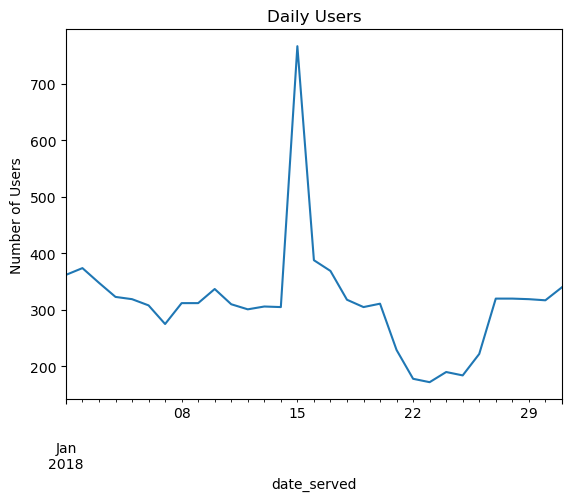

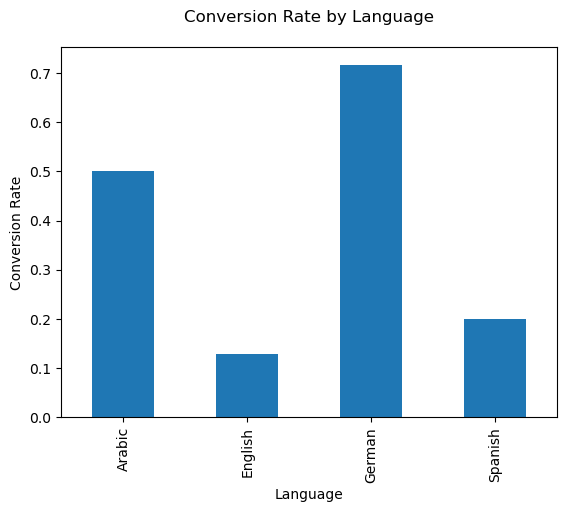

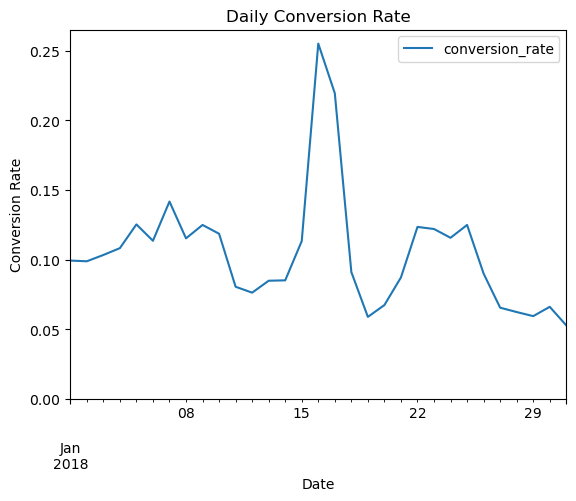

In [72]:
# Deterimne number of users per day
daily_users=marketing.groupby("date_served")['user_id'].nunique()
daily_users.plot()
plt.title("Daily Users")
plt.ylabel("Number of Users")
plt.show()

# Determine conversion rate by language
conv_rate_l= get_rate(marketing,"language_displayed","converted")
conv_rate_l.plot(kind="bar")
plt.title("Conversion Rate by Language\n")
plt.ylabel("Conversion Rate")
plt.xlabel("Language")
plt.show()

# Determine daily conversion rate
conv_d = get_rate(marketing,"date_served","converted")
df_conv_d = pd.DataFrame(conv_d.reset_index())
df_conv_d.columns = ["date_served","conversion_rate"]
df_conv_d.plot("date_served","conversion_rate")
plt.title("Daily Conversion Rate")
plt.ylabel("Conversion Rate")
plt.xlabel("Date")
plt.ylim(0)
plt.show()

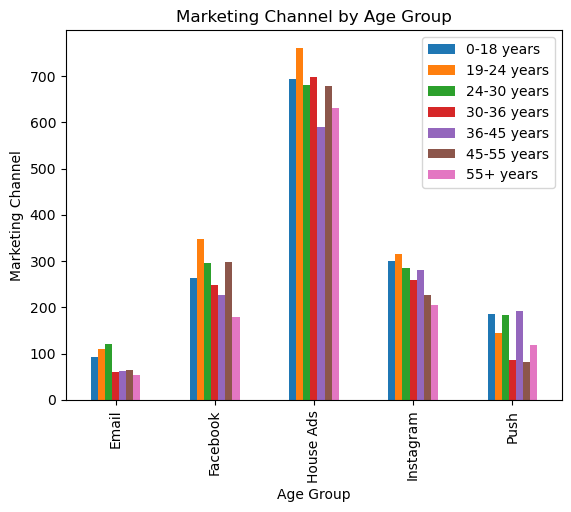

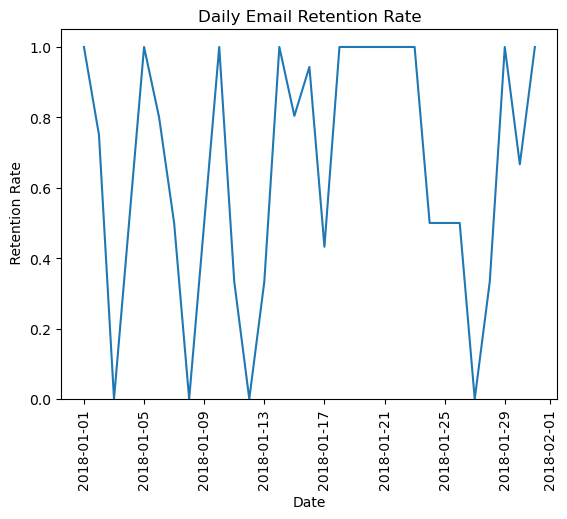

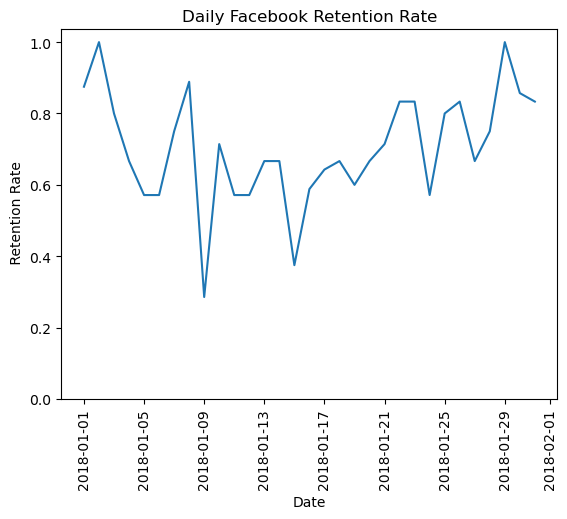

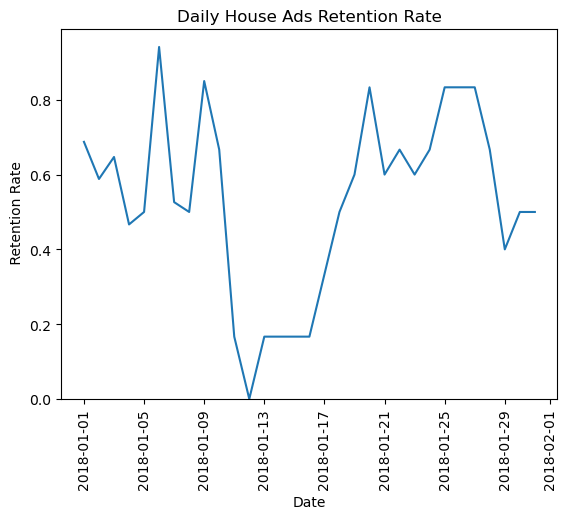

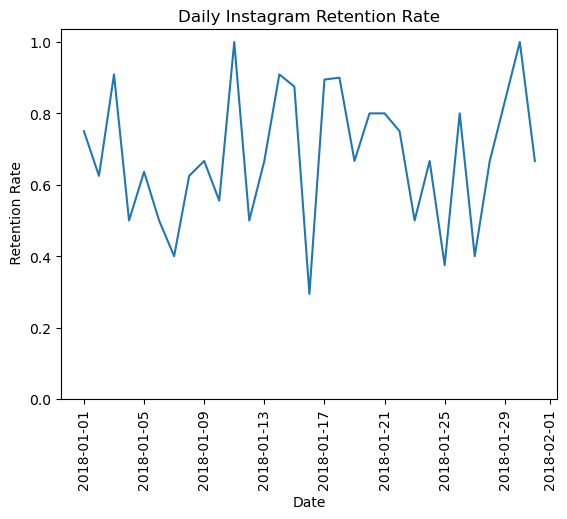

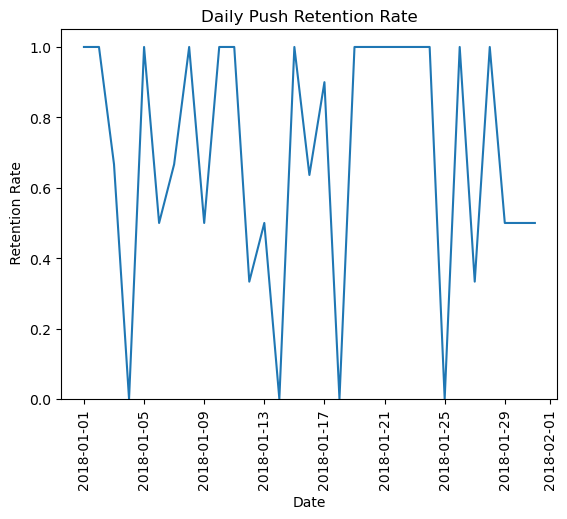

<Figure size 640x480 with 0 Axes>

In [2]:
# Marketing Channels for different age groups
channel_age=marketing.groupby(["marketing_channel","age_group"])["user_id"].count()
df_channel_age= pd.DataFrame(channel_age.unstack(level=1))
df_channel_age.plot(kind="bar")
plt.title("Marketing Channel by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Marketing Channel")
plt.legend(loc="upper right", labels=df_channel_age.columns.values)
plt.show()

# Determine daily retention rates for each marketing channel
retention_rate = get_rate(marketing,["date_subscribed","subscribing_channel"],"is_retained")
df_retention_rate=pd.DataFrame(retention_rate.unstack(level=1))
plot_rate_line(df_retention_rate,"is_retained", True)



House ad retention rate drops significantly on 2018-01-11. Further investigation needed.

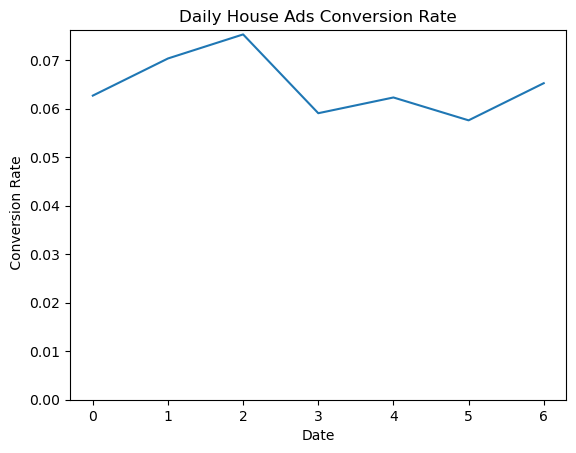

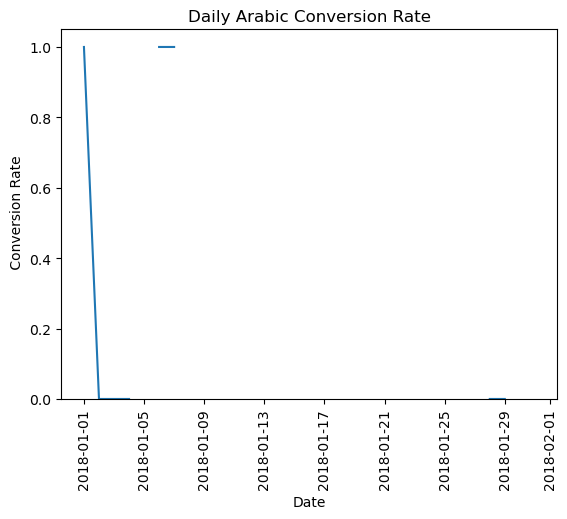

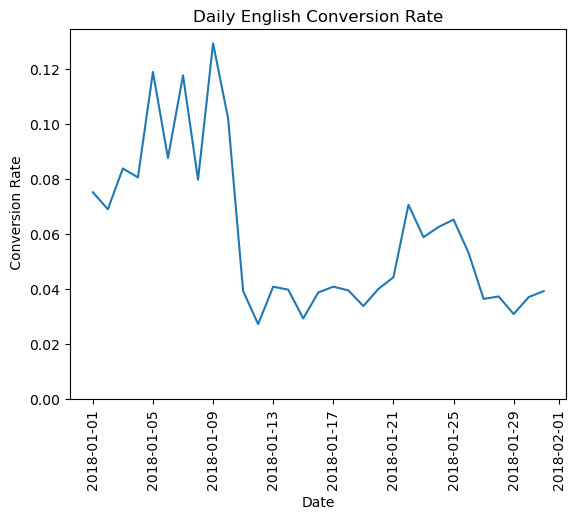

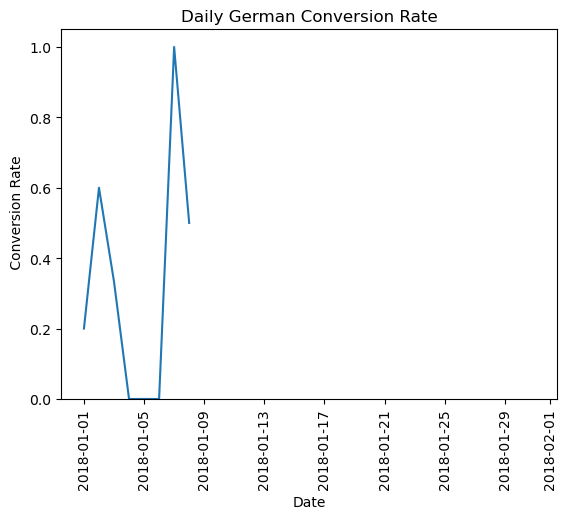

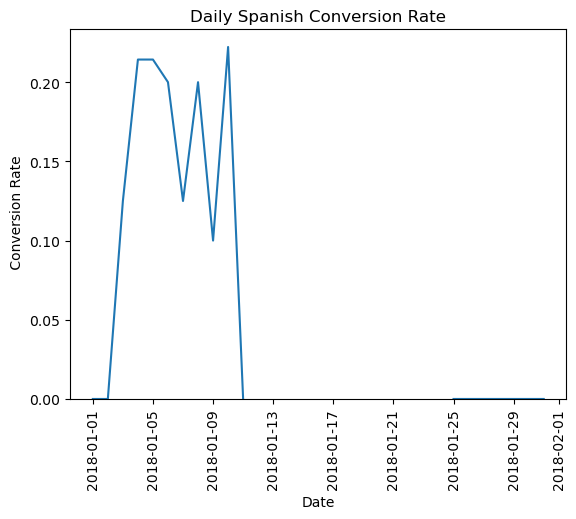

C:\Users\markd\AppData\Local\Temp\ipykernel_12004\3876633611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads["is_correct_language"] = np.where(house_ads["language_preferred"] == house_ads["language_displayed"],"Yes","No")


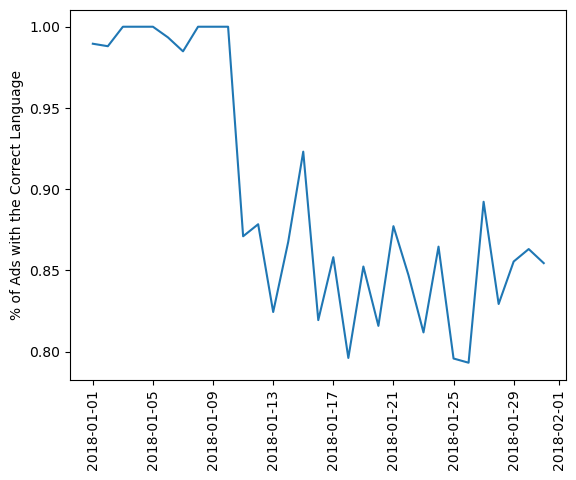

In [3]:
# Determine Day of Week conversion rates for House Ads
house_ads = marketing[marketing["marketing_channel"] == "House Ads"]
dow_conv_rate = get_rate(house_ads,["DoW_Served","marketing_channel"],"converted")
df_dow = pd.DataFrame(dow_conv_rate.unstack(level=1))
plot_rate_line(df_dow,"converted", False)

# Determine Daily conversion rate for house ads by language
lang_con_rate = get_rate(house_ads,["date_served","language_displayed"],"converted")
df_lang = pd.DataFrame(lang_con_rate.unstack(level=1))
plot_rate_line(df_lang,"converted",True)

# Check if ad language is correct.
house_ads["is_correct_language"] = np.where(house_ads["language_preferred"] == house_ads["language_displayed"],"Yes","No")
language_check = house_ads.groupby(["date_served","is_correct_language"])["is_correct_language"].count()
df_language_check = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
df_language_check["pct_correct"] = df_language_check["Yes"] / df_language_check.sum(axis=1)
plt.plot(df_language_check.index.values,df_language_check["pct_correct"])
plt.ylabel("% of Ads with the Correct Language")
plt.xticks(rotation=90)        
plt.show()

Conversion rate changes by day of the week is not significant. English language conversion rate drops around the 11th, while other languages are not served ads continuously throughout the month. The percentage of house ads that are delivered in the correct language decreases significantly on the 11th. 